# Парсер HeadHunter
## Цель:
* Написать парсер, чтобы упростить поиск вакансий на hh.ru

### Импорт библиотек

In [7]:
import requests
import pandas as pd
import numpy as np

import json

from datetime import datetime, timedelta
import time
import os
from IPython.core.display import display, HTML, clear_output
import ipywidgets as widgets
from typing import Union

import matplotlib.pyplot as plt
import seaborn as sns

### Делаем выгрузку из HeadHunter
Ссылка на API HH: https://github.com/hhru/api 

Создадим необходимые константы: BASE_URL

In [8]:
BASE_URL = "https://api.hh.ru/"


TEXT = f'SQL NAME:("Аналитик" or "Analyst" or "Marketing Data Analyst" or "Маркетинговый аналитик" or "Аналитик данных" or "Junior Data Analyst" or "Младший аналитик данных" or "Data Scientist")'

dt_now = datetime.now().date()
dt_from = dt_now - timedelta(days=7)
DATE_TO = dt_now.isoformat() #API требует дату в формате ISO 8601 YYYY-MM-DD или YYYY-MM-DDThh:mm:ss±hhmm
DATE_FROM = dt_from.isoformat()

VAC_URL = BASE_URL + f'vacancies?text={TEXT}&date_from={DATE_FROM}&date_to={DATE_TO}&responses_count_enabled=True&per_page=100'

vacancy_df = pd.DataFrame() # создаем датафрейм, в который будем сохранять данные

В выдаче API HH нет опыта работы, поэтому мы укажем его в запросе самостоятельно:

In [9]:
experiences = ['noExperience',
               'between1And3',
               'between3And6', 
               'moreThan6']

Напишем цикл для направления запросов к API

In [15]:
for exp in experiences:
    page = 0 #первая страница с вакансиями
    url = VAC_URL + f'&experience={exp}'
    try:
        r = requests.get(url + f'&page={page}')
        data = json.loads(r.text)
        print(exp, ' - ', data['pages'])
        for page in range(1, data['pages']):
            r = requests.get(url + f'&page={page}')
            data = json.loads(r.text)
            items += data['items']
        df = pd.DataFrame(items)
        df['experience'] = exp
        vacancy_df = pd.concat([vacancy_df, df])
    except Exception as e:
        print(exp, ' - ', e)
        time.sleep(10)

noExperience  -  3
between1And3  -  20
between3And6  -  9
moreThan6  -  1


In [16]:
vacancy_df.head()

,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,...,employer,snippet,contacts,schedule,counters,working_days,working_time_intervals,working_time_modes,accept_temporary,experience
0,52179349,False,Lead Data Analyst/Data Scientist,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",None,...,"{'id': '2383', 'name': 'Citibank', 'url': 'htt...",{'requirement': 'Higher Education (<highlightt...,None,"{'id': 'fullDay', 'name': 'Полный день'}",{'responses': 7},[],[],[],False,noExperience
1,52201915,False,Главный аналитик (remote),None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",None,...,"{'id': '5908762', 'name': 'IYNO', 'url': 'http...","{'requirement': 'Опыт создания SRS, BRD, FSD. ...",None,"{'id': 'remote', 'name': 'Удаленная работа'}",{'responses': 1},[],[],[],True,noExperience
2,51799231,False,Системный аналитик / IT аналитик,None,False,False,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'from': 120000, 'to': 200000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}",None,...,"{'id': '3132641', 'name': 'Артеко', 'url': 'ht...",{'requirement': 'Базовые знания в области упра...,None,"{'id': 'remote', 'name': 'Удаленная работа'}",{'responses': 22},[],[],[],False,noExperience
3,50922927,False,Lead product analyst,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",None,...,"{'id': '913195', 'name': 'DigitalHR', 'url': '...",{'requirement': 'Опыт управления командами про...,None,"{'id': 'fullDay', 'name': 'Полный день'}",{'responses': 1},[],[],[],False,noExperience
4,51994777,False,Controlling Analyst,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Тверская улица',...",...,"{'id': '545335', 'name': 'Sanofi', 'url': 'htt...",{'requirement': '2-3 year (not more) experienc...,None,"{'id': 'fullDay', 'name': 'Полный день'}",{'responses': 28},[],[],[],False,noExperience


In [17]:
vacancy_df.reset_index(drop=True, inplace=True)

In [18]:
vacancy_df.tail()

,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,...,employer,snippet,contacts,schedule,counters,working_days,working_time_intervals,working_time_modes,accept_temporary,experience
7953,50813233,False,Наставник на курсы по Data Science и Дата анал...,None,False,False,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...",None,"{'id': 'open', 'name': 'Открытая'}",None,...,"{'id': '5008932', 'name': 'Яндекс.Практикум', ...",{'requirement': '<highlighttext>Аналитик</high...,None,"{'id': 'remote', 'name': 'Удаленная работа'}",{'responses': 3},[],[],[],False,moreThan6
7954,50738938,False,Ведущий системный аналитик в команду распредел...,"{'id': '8582-8582-lmofis', 'name': 'Леруа Мерл...",False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': None, 'street': None, 'building': Non...",...,"{'id': '8582', 'name': 'Леруа Мерлен', 'url': ...",{'requirement': 'Опыт работы системным или биз...,None,"{'id': 'flexible', 'name': 'Гибкий график'}",{'responses': 0},[],[],[],False,moreThan6
7955,51358398,False,Эксперт-аналитик по сопровождению программного...,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 150000, 'to': None, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Басманный тупик'...",...,"{'id': '108705', 'name': 'Мик-Информ, компания...",{'requirement': 'Опыт работы в проектах по авт...,None,"{'id': 'fullDay', 'name': 'Полный день'}",{'responses': 3},[],[],[],False,moreThan6
7956,49222813,False,Менеджер по анализу и разработке систем Track&...,None,False,False,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...",None,"{'id': 'open', 'name': 'Открытая'}",None,...,"{'id': '162', 'name': 'JTI', 'url': 'https://a...",{'requirement': 'Strong knowledge of the follo...,None,"{'id': 'fullDay', 'name': 'Полный день'}",{'responses': 2},[],[],[],False,moreThan6
7957,51284212,False,Системный аналитик на проект СУРР (Система упр...,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'улица Стромынка'...",...,"{'id': '6591', 'name': 'Промсвязьбанк', 'url':...",{'requirement': 'Знание общих принципов шин <h...,None,"{'id': 'fullDay', 'name': 'Полный день'}",{'responses': 2},[],[],[],False,moreThan6


In [19]:
vacancy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7958 entries, 0 to 7957
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        7958 non-null   object
 1   premium                   7958 non-null   bool  
 2   name                      7958 non-null   object
 3   department                1157 non-null   object
 4   has_test                  7958 non-null   bool  
 5   response_letter_required  7958 non-null   bool  
 6   area                      7958 non-null   object
 7   salary                    1531 non-null   object
 8   type                      7958 non-null   object
 9   address                   3966 non-null   object
 10  response_url              0 non-null      object
 11  sort_point_distance       0 non-null      object
 12  published_at              7958 non-null   object
 13  created_at                7958 non-null   object
 14  archived                

### Вытащим ценную информацию из словарей

In [20]:
#обработаем пропуски и вытащим id
def return_id(x, key='id', nan_value=np.nan):
    try:
        return x[key]
    except Exception as e:
        return nan_value

In [21]:
# выведем интересующие нас столбцы
vacancy_df['employer_name'] = vacancy_df['employer'].apply(return_id, key='name')
vacancy_df['department_name'] = vacancy_df['department'].apply(return_id, key='name')
vacancy_df['salary_from'] = vacancy_df['salary'].apply(return_id, key='from')
vacancy_df['salary_to'] = vacancy_df['salary'].apply(return_id, key='to')
vacancy_df['salary_gross'] = vacancy_df['salary'].apply(return_id, key='gross')
vacancy_df['salary_currency'] = vacancy_df['salary'].apply(return_id, key='currency')
vacancy_df['city'] = vacancy_df['area'].apply(return_id, key='name')
vacancy_df['responses'] = vacancy_df['counters'].apply(return_id, key='responses')

In [22]:
vacancy_df.head()

,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,...,accept_temporary,experience,employer_name,department_name,salary_from,salary_to,salary_gross,salary_currency,city,responses
0,52179349,False,Lead Data Analyst/Data Scientist,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",None,...,False,noExperience,Citibank,NaN,NaN,NaN,NaN,NaN,Москва,7
1,52201915,False,Главный аналитик (remote),None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",None,...,True,noExperience,IYNO,NaN,NaN,NaN,NaN,NaN,Москва,1
2,51799231,False,Системный аналитик / IT аналитик,None,False,False,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'from': 120000, 'to': 200000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}",None,...,False,noExperience,Артеко,NaN,120000.0,200000.0,False,RUR,Санкт-Петербург,22
3,50922927,False,Lead product analyst,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",None,...,False,noExperience,DigitalHR,NaN,NaN,NaN,NaN,NaN,Москва,1
4,51994777,False,Controlling Analyst,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Тверская улица',...",...,False,noExperience,Sanofi,NaN,NaN,NaN,NaN,NaN,Москва,28


### Про дубликаты

In [25]:
# 
vacancy_df[vacancy_df.duplicated(['employer_name', 'name', 'city'], keep=False)][['employer_name', 'name', 'city', 'experience']].sort_values(by=['name'])

,employer_name,name,city,experience
5722,STM Labs,Analyst,Нижний Новгород,moreThan6
2859,Первый Украинский Международный банк,Analyst,Киев,between3And6
4411,NOVARDIS,Analyst,Киров (Кировская область),between3And6
4410,NOVARDIS,Analyst,Санкт-Петербург,between3And6
793,STM Labs,Analyst,Нижний Новгород,between1And3
...,...,...,...,...
3994,Императорский монетный двор,Эксперт-аналитик баз данных,Москва,between3And6
1927,Императорский монетный двор,Эксперт-аналитик баз данных,Москва,between1And3
6856,Императорский монетный двор,Эксперт-аналитик баз данных,Москва,moreThan6
5093,"Мик-Информ, компания",Эксперт-аналитик по сопровождению программного...,Москва,between3And6


### Посмотрим компании, предлагающие вакансии, а также города

<AxesSubplot:>

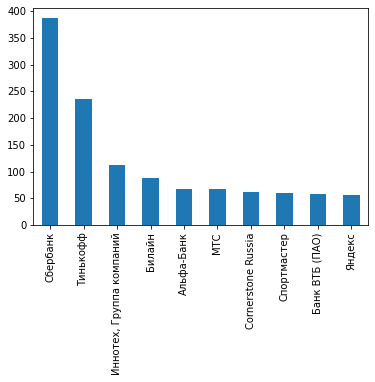

In [26]:
vacancy_df['employer_name'].value_counts().head(10).plot(kind='bar')

<AxesSubplot:>

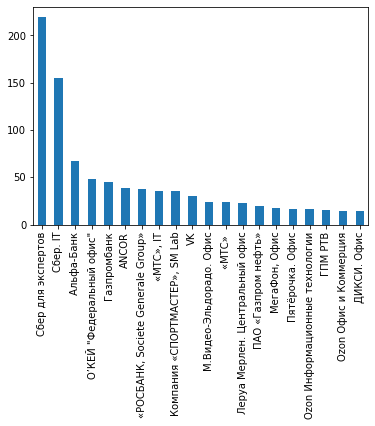

In [27]:
vacancy_df['department_name'].value_counts().head(20).plot(kind='bar')

<AxesSubplot:>

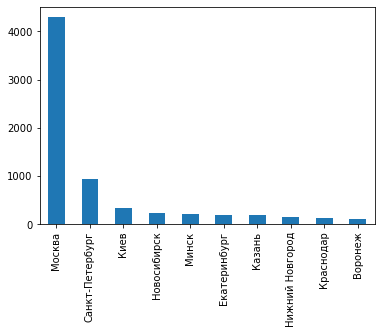

In [28]:
vacancy_df['city'].value_counts().head(10).plot(kind='bar')

### Проанализируем зарплату

In [31]:
vacancy_df['salary_from'].isna().value_counts(normalize=True)

True     0.83991
False    0.16009
Name: salary_from, dtype: float64

In [32]:
vacancy_df['salary_to'].isna().value_counts(normalize=True)

True     0.891556
False    0.108444
Name: salary_to, dtype: float64

In [34]:
vacancy_df['salary_currency'].value_counts(normalize=True)

RUR    0.915088
USD    0.053560
UAH    0.009798
EUR    0.006532
BYR    0.005879
KZT    0.005225
KGS    0.001960
UZS    0.001960
Name: salary_currency, dtype: float64

In [44]:
salaries = vacancy_df.query("salary_currency == 'RUR' and experience in ['noExperience', 'between1And3','between3And6']").groupby(['employer_name', 'department_name']).mean()['salary_from'].reset_index()

In [45]:
salaries

,employer_name,department_name,salary_from
0,ANCOR,ANCOR,68480.0
1,Avilon Group,ГК «Авилон»,180000.0
2,HeadHunter,HeadHunter:: IT,170000.0
3,Азбука вкуса,Офис «Азбука вкуса»,160000.0
4,"ДИКСИ, группа компаний",ДИКСИ. Офис,140000.0
5,"Лента, федеральная розничная сеть","Лента, федеральная розничная сеть, Офис",NaN
6,Леруа Мерлен,Леруа Мерлен. Центральный офис,200000.0
7,МегаФон,"МегаФон, IT",66000.0
8,ОКЕЙ – Федеральная розничная сеть,"О’КЕЙ ""Федеральный офис""",NaN
9,Почта России,"«Почта России», Офис",95000.0


<AxesSubplot:xlabel='employer_name', ylabel='salary_from'>

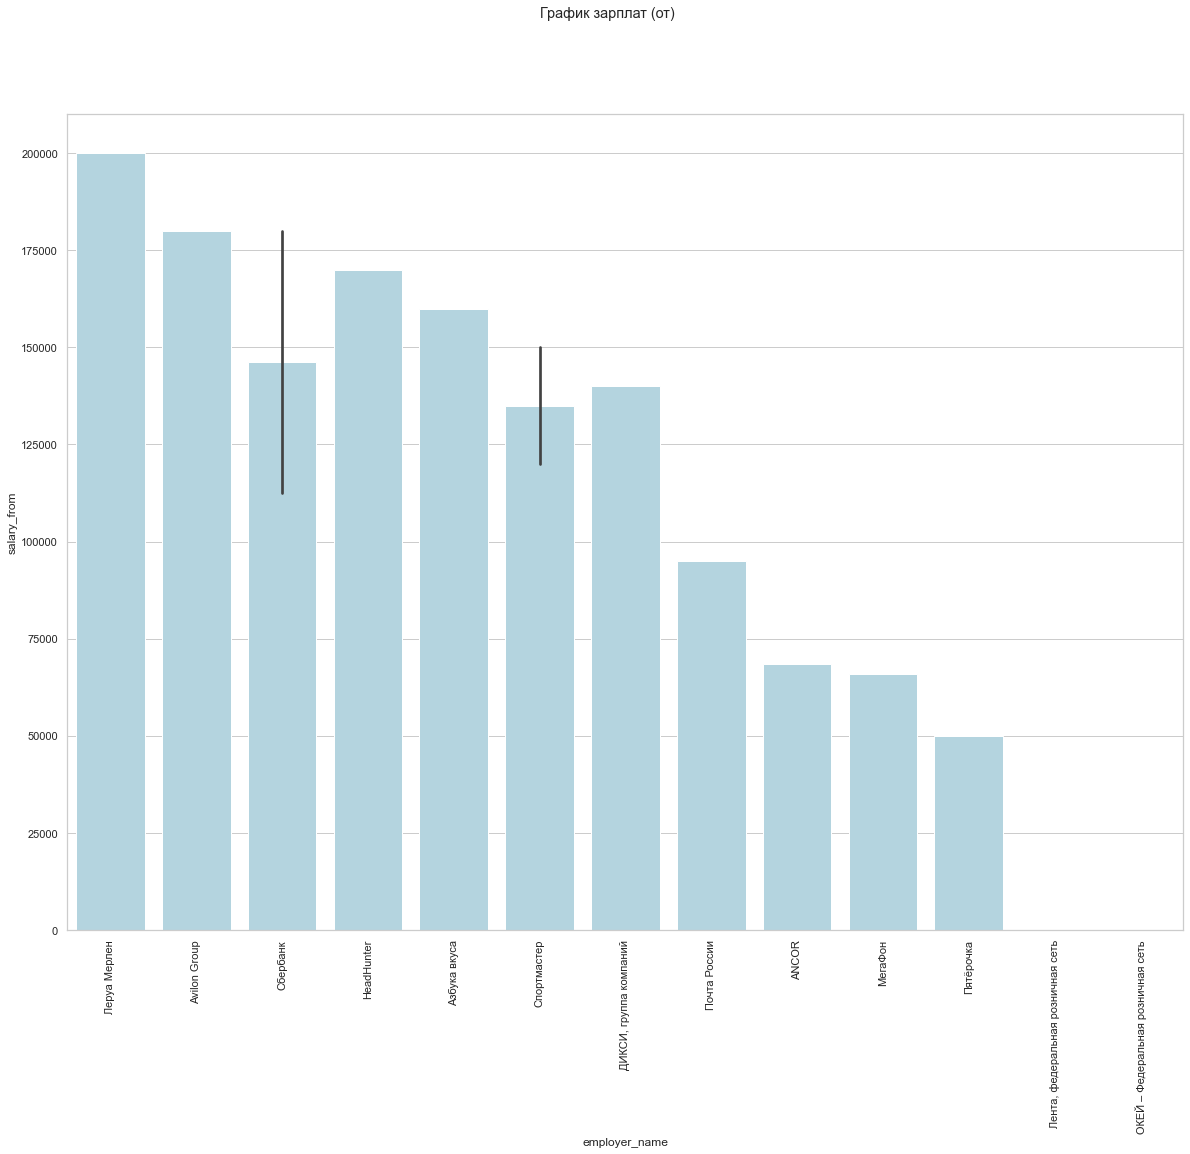

In [46]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(20,15))                
title = 'График зарплат (от)'
fig.suptitle(title)
plt.xticks(rotation=90)  
sns.barplot(data=salaries.sort_values(by='salary_from', ascending=False), x='employer_name', y='salary_from', color='lightblue', ax=ax)

In [47]:
vacancy_df.dropna(subset=['employer_name', 'salary_from'])[vacancy_df['employer_name'].str.lower().str.contains('headhunter')]

<ipython-input-47-47dd2bad5789>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vacancy_df.dropna(subset=['employer_name', 'salary_from'])[vacancy_df['employer_name'].str.lower().str.contains('headhunter')]


,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,...,accept_temporary,experience,employer_name,department_name,salary_from,salary_to,salary_gross,salary_currency,city,responses
1519,49881796,False,Аналитик направления цифрового маркетинга (BI\...,"{'id': 'hh-1455-IT', 'name': 'HeadHunter:: IT'}",False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 170000, 'to': 210000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'улица Годовикова...",...,False,between1And3,HeadHunter,HeadHunter:: IT,170000.0,210000.0,False,RUR,Москва,21
3586,49881796,False,Аналитик направления цифрового маркетинга (BI\...,"{'id': 'hh-1455-IT', 'name': 'HeadHunter:: IT'}",False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 170000, 'to': 210000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'улица Годовикова...",...,False,between3And6,HeadHunter,HeadHunter:: IT,170000.0,210000.0,False,RUR,Москва,21
6448,49881796,False,Аналитик направления цифрового маркетинга (BI\...,"{'id': 'hh-1455-IT', 'name': 'HeadHunter:: IT'}",False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 170000, 'to': 210000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'улица Годовикова...",...,False,moreThan6,HeadHunter,HeadHunter:: IT,170000.0,210000.0,False,RUR,Москва,21


<AxesSubplot:xlabel='department_name', ylabel='salary_from'>

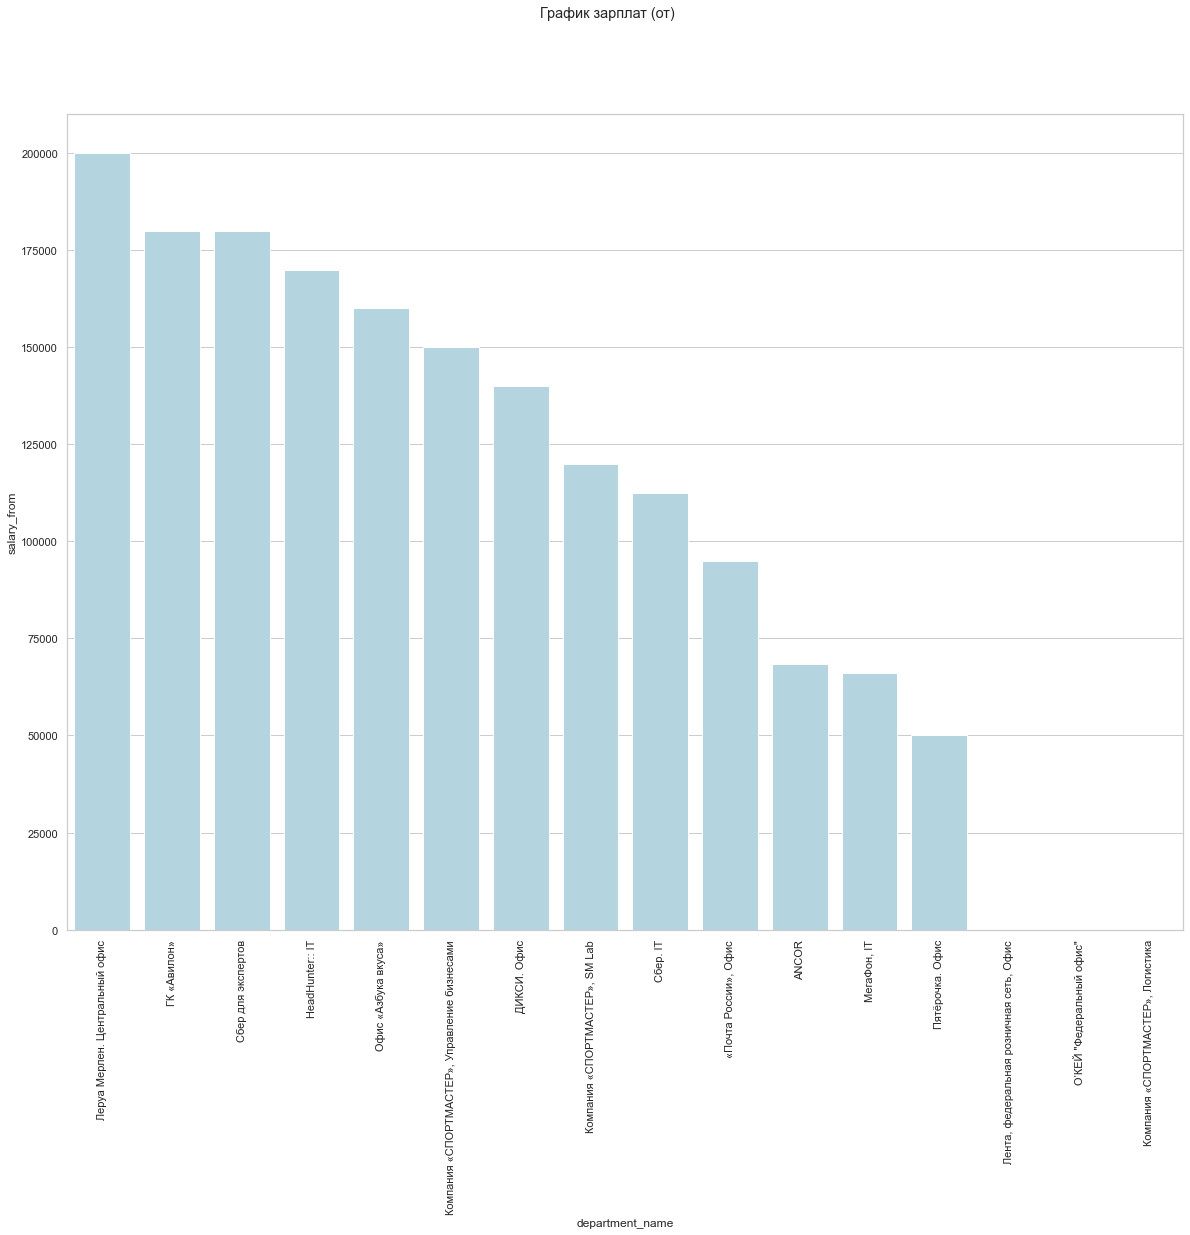

In [48]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(20,15))                
title = 'График зарплат (от)'
fig.suptitle(title)
plt.xticks(rotation=90)  
sns.barplot(data=salaries.sort_values(by='salary_from', ascending=False), x='department_name', y='salary_from', color='lightblue', ax=ax)

### Давайте поищем вакансии

In [49]:
city_vacs = vacancy_df[vacancy_df['city'] == 'Самара']

In [50]:
city_vacs

,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,...,accept_temporary,experience,employer_name,department_name,salary_from,salary_to,salary_gross,salary_currency,city,responses
107,43021951,False,Стажер аналитик-проектировщик (удаленно),None,True,False,"{'id': '78', 'name': 'Самара', 'url': 'https:/...",None,"{'id': 'open', 'name': 'Открытая'}",None,...,False,noExperience,Финансовые Информационные Системы,NaN,NaN,NaN,NaN,NaN,Самара,3
141,50897036,False,Бизнес / Системный Аналитик в ИТ,None,True,False,"{'id': '78', 'name': 'Самара', 'url': 'https:/...","{'from': 50000, 'to': 250000, 'currency': 'RUR...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Самара', 'street': 'улица Степана Ра...",...,False,noExperience,VDcom,NaN,50000.0,250000.0,True,RUR,Самара,0
144,48359224,False,Младший системный аналитик Terrasoft Creatio,None,False,False,"{'id': '78', 'name': 'Самара', 'url': 'https:/...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Самара', 'street': 'Московское шоссе...",...,False,noExperience,TRACE,NaN,NaN,NaN,NaN,NaN,Самара,4
163,52127945,False,Аналитик по автоматизации управления и реализа...,"{'id': 'mgfn-3127-engine', 'name': 'МегаФон, И...",False,False,"{'id': '78', 'name': 'Самара', 'url': 'https:/...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Самара', 'street': 'Московское шоссе...",...,False,noExperience,МегаФон,"МегаФон, Инженерные",NaN,NaN,NaN,NaN,Самара,4
274,43021951,False,Стажер аналитик-проектировщик (удаленно),None,True,False,"{'id': '78', 'name': 'Самара', 'url': 'https:/...",None,"{'id': 'open', 'name': 'Открытая'}",None,...,False,between1And3,Финансовые Информационные Системы,NaN,NaN,NaN,NaN,NaN,Самара,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7592,52154890,False,System Analyst (Fair Pricing),"{'id': '3529-3529-prof', 'name': 'Сбер для экс...",False,False,"{'id': '78', 'name': 'Самара', 'url': 'https:/...",None,"{'id': 'open', 'name': 'Открытая'}",None,...,False,moreThan6,Сбербанк,Сбер для экспертов,NaN,NaN,NaN,NaN,Самара,0
7697,52174260,False,Аналитик (Fair Pricing),"{'id': '3529-3529-prof', 'name': 'Сбер для экс...",False,False,"{'id': '78', 'name': 'Самара', 'url': 'https:/...",None,"{'id': 'open', 'name': 'Открытая'}",None,...,False,moreThan6,Сбербанк,Сбер для экспертов,NaN,NaN,NaN,NaN,Самара,0
7754,50582828,False,Ведущий Web аналитик ( удаленно),None,False,False,"{'id': '78', 'name': 'Самара', 'url': 'https:/...","{'from': 170000, 'to': None, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",None,...,False,moreThan6,Моё дело,NaN,170000.0,NaN,True,RUR,Самара,1
7828,52085099,False,Аналитик качества данных (QA),"{'id': '3529-3529-prof', 'name': 'Сбер для экс...",False,False,"{'id': '78', 'name': 'Самара', 'url': 'https:/...",None,"{'id': 'open', 'name': 'Открытая'}",None,...,False,moreThan6,Сбербанк,Сбер для экспертов,NaN,NaN,NaN,NaN,Самара,2


### Посмотрим содержание вакансий

In [52]:
vacs_df = city_vacs.copy().reset_index(drop=True).query("experience in ['noExperience', 'between1And3','between3And6']")

In [54]:
vacs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 0 to 58
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        59 non-null     object 
 1   premium                   59 non-null     bool   
 2   name                      59 non-null     object 
 3   department                21 non-null     object 
 4   has_test                  59 non-null     bool   
 5   response_letter_required  59 non-null     bool   
 6   area                      59 non-null     object 
 7   salary                    15 non-null     object 
 8   type                      59 non-null     object 
 9   address                   22 non-null     object 
 10  response_url              0 non-null      object 
 11  sort_point_distance       0 non-null      object 
 12  published_at              59 non-null     object 
 13  created_at                59 non-null     object 
 14  archived    

In [55]:
vacs_df['url'].head()

0    https://api.hh.ru/vacancies/43021951?host=hh.ru
1    https://api.hh.ru/vacancies/50897036?host=hh.ru
2    https://api.hh.ru/vacancies/48359224?host=hh.ru
3    https://api.hh.ru/vacancies/52127945?host=hh.ru
4    https://api.hh.ru/vacancies/43021951?host=hh.ru
Name: url, dtype: object

Сохраним информацию в читаемом виде

In [57]:
HTML(json.loads(requests.get('https://api.hh.ru/vacancies/43021951?host=hh.ru').text)['description'])

Добавим кнопку

In [59]:
vacs = vacs_df['url'].apply(lambda x: HTML(json.loads(requests.get(x).text)['description'])) 

In [60]:
vacs

0     <IPython.core.display.HTML object>
1     <IPython.core.display.HTML object>
2     <IPython.core.display.HTML object>
3     <IPython.core.display.HTML object>
4     <IPython.core.display.HTML object>
5     <IPython.core.display.HTML object>
6     <IPython.core.display.HTML object>
7     <IPython.core.display.HTML object>
8     <IPython.core.display.HTML object>
9     <IPython.core.display.HTML object>
10    <IPython.core.display.HTML object>
11    <IPython.core.display.HTML object>
12    <IPython.core.display.HTML object>
13    <IPython.core.display.HTML object>
14    <IPython.core.display.HTML object>
15    <IPython.core.display.HTML object>
16    <IPython.core.display.HTML object>
17    <IPython.core.display.HTML object>
18    <IPython.core.display.HTML object>
19    <IPython.core.display.HTML object>
20    <IPython.core.display.HTML object>
21    <IPython.core.display.HTML object>
22    <IPython.core.display.HTML object>
23    <IPython.core.display.HTML object>
24    <IPython.c

In [77]:
button = widgets.Button(description='Click me')
output = widgets.Output()

display(button, output)

counter = 0
def on_clicked(b):
    with output:
        try:
            global counter
            clear_output()
            
            print('№ Вакансии', counter)
            display(HTML("<h1>" + str(vacs_df['name'][counter]) + " в " + str(vacs_df['employer_name'][counter]) + "</h1>"))
            display(vacs[counter])
            display(HTML('"<a href="' + str(vacs_df['alternate_url'][counter]) + '" target="_blank">Ссылка на вакансию</a>'))
            counter += 1
        except Exception as e:
            ('Вакансии закончились')
            
button.on_click(on_clicked)

Button(description='Click me', style=ButtonStyle())

Output()

С помощью библиотеки BeautifulSoup извлечем данные из HTML

In [79]:
from bs4 import BeautifulSoup

text = vacs_df['url'].apply(lambda x: BeautifulSoup(json.loads(requests.get(x).text)['description']).get_text()) 

In [80]:
text[3]

'Какие задачи необходимо решать:  Анализ потребностей по улучшению бизнес процессов реализации, подготовка предложений и сопровождение изменений информационных систем; Разработка инструментов сквозной автоматизации процессов реализации проектов инфраструктуры; Разработка аналитических и операционных дашбордов; Автоматизация сбора данных.  Для решения этих задач требуется:  Высшее профессиональное образование или также студенты последних курсов; Знание принципов работы СУБД Oracle, языков запросов: SQL, PL/SQL; Навыки применения Python для анализа данных; Активная жизненная позиция, желание работать в команде, получать новые знания и применять их на практике.  Мы предлагаем:  Работа в одной из самых крупных телекоммуникационных компаний России; Официальное оформление в штат компании с первого дня работы и полностью «белая» заработная плата и квартальные премии; Теплая и дружественная атмосфера в коллективе, помощь в адаптации на новом месте; Реальные возможности для профессионального ро

<div class="alert alert-info">
Домашнее задание: воспроизвести проект. Срок дедлайна - 14 февраля (понедельник)
    
Контакты:\
sekotskiy@yandex-team.ru
или в Slack
</div>